In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy

from dataloaders import *
from util import Config
from viz_utils import *

In [2]:
datasets = ["MRPC", "TREC-2", "SUBJ", "AGN-2", "TREC-6", "AGN-4", "SST"]
dataset_map = {
    "TREC-2": "TREC-2",
    "SUBJ": "SUBJ",
    "AGN-2": "AGN-2",
    "TREC-6": "TREC-full",
    "SST": "SST",
    "COLA": "COLA",
    "AGN-4": "ag_news-full",
}
models = ["BERT", "ELECTRA"]
load_anti = False
n = 0  # AL step at which evaluation (AUC) starts
model = "BERT"
mode = "ada"
dataset = "TREC-6"

aucs = []
trs = []
try:
    experiments, meta = load_results(
        base_dir=f"results/",
        dataset=dataset,
        model=model,
    )
except:
    print(f"No experiments for {dataset}-{model}-{mode}")
for load_mode in ["last", "best"]:
    if mode == "short" and load_mode == "best":
        continue
    mode_print = mode if load_mode == "last" else f"{mode}-besov"
    print(f"Loading {dataset} -- {mode_print} -- {model}")
    df_tr_i = results_to_df(experiments, mode=load_mode)

    df_tr_i["model"] = model
    df_tr_i["mode"] = mode_print
    df_tr_i["dataset"] = dataset
    df_tr_i = df_tr_i.reset_index().set_index(
        ["dataset", "model", "mode", "sampler", "experiment", "al_iter"]
    )
    trs.append(df_tr_i)

    df_auc_i = al_auc(df_tr_i)
    df_auc_i["mode"] = mode_print
    df_auc_i = df_auc_i.reset_index().set_index(["mode", "sampler"])
    aucs.append(df_auc_i)


# plot_besov_index(df_tr, ci=0)
# plot_al_accuracy(df_tr, metric="f1_micro", ci=0)
df_tr = pd.concat(trs)
df_auc = pd.concat(aucs)

TREC-6-BERT
Loading TREC-6 -- ada -- BERT
Loading TREC-6 -- ada-besov -- BERT


(200.0, 1000.0)

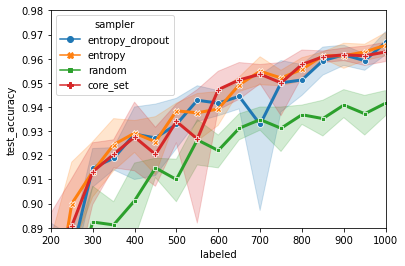

In [9]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "ada-besov"],
    x="labeled",
    y="test_accuracy",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=95,
    linewidth=3,
)
# plt.legend(loc='lower right')
g.set_ylim(0.89, 0.98)
g.set_xlim(200, 1000)

In [3]:
df_tr

labeled  train_loss  \
dataset model mode      sampler experiment al_iter                        
TREC-2  BERT  ada-besov random  0          0            100    0.657703   
                                           1            150    0.662511   
                                           2            200    0.651112   
                                           3            250    0.633320   
                                           4            300    0.642351   
...                                                     ...         ...   
                        entropy 4          14           800    0.658221   
                                           15           850    0.649009   
                                           16           900    0.659438   
                                           17           950    0.656500   
                                           18          1000    0.648496   

                                                    test_accuracy  f1_micro  \
dataset model mode      sampler experiment al_iter                            
TREC-2  BERT  ada-besov random  0          0             0.674897  0.674897   
                                           1             0.709877  0.709877   
                                           2             0.695473  0.695473   
                                           3             0.738683  0.738683   
                                           4             0.732510  0.732510   
...                                                           ...       ...   
                        entropy 4          14            0.775720  0.775720   
                                           15            0.806584  0.806584   
                                           16            0.800412  0.800412   
                                           17            0.818930  0.818930   
                                           18            0.816872  0.816872   

                                                    f1_macro  \
dataset model mode      sampler experiment al_iter             
TREC-2  BERT  ada-besov random  0          0        0.673964   
                                           1        0.701160   
                                           2        0.691073   
                                           3        0.738194   
                                           4        0.732143   
...                                                      ...   
                        entropy 4          14       0.771635   
                                           15       0.806466   
                                           16       0.799964   
                                           17       0.818820   
                                           18       0.816853   

                                                                                             selected  
dataset model mode      sampler experiment al_iter                                                     
TREC-2  BERT  ada-besov random  0          0        [1549, 1546, 1179, 111, 561, 1832, 619, 56, 51...  
                                           1        [364, 841, 941, 922, 152, 1904, 903, 450, 447,...  
                                           2        [142, 543, 930, 872, 865, 1646, 95, 589, 513, ...  
                                           3        [1630, 1187, 1237, 1552, 682, 1424, 357, 178, ...  
                                           4        [499, 1225, 1423, 438, 1077, 1637, 566, 1410, ...  
...                                                                                               ...  
                        entropy 4          14       [1416, 1090, 83, 524, 1923, 1278, 1293, 882, 1...  
                                           15       [1763, 240, 1153, 246, 1013, 1552, 1818, 1850,...  
                                           16       [168, 1248, 1598, 714, 784, 1841, 1253, 1873, ...  
                                           17       [1455, 1577, 1788, 

In [5]:
df_tr.groupby(["dataset", "model", "model", "sampler", "experiment"]).agg(list)

labeled  \
dataset model model sampler         experiment                                                      
TREC-2  BERT  BERT  core_set        0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    dal             0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    entropy         0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    entropy_dropout 0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                    random          0           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    1           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    2           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    3           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   
                                    4           [100, 150, 200, 250, 300, 350, 400, 450, 500, ...   

                                                                                       train_loss  \
dataset model model sampler         experiment                                                      
TREC-2  BERT  BERT  core_set        0           [0.6577029973268509, 0.6469762802124024, 0.636...   
                                    1           [0.6459900438785553, 0.6821997761726379, 0.616...   
                                    2           [0.6794537752866745, 0.6754907011985779, 0.601...   
                                    3           [0.6245803534984589, 0.6158845901489258, 0.592...   
                                    4           [0.650259718298912, 0.6353173375129699, 0.6251...   
                    dal             0           [0.6577029973268509, 0.6642346858978272, 0.663...   
                                    1           [0.6459900438785553, 0.6488877415657044, 0.636...   
                                    2           [0.6794537752866745, 0.651800012588501, 0.6412...   
                                    3           [0.6245803534984589, 0.6310327291488648, 0.683...   
                                    4           [0.650259718298912, 0.6481092929840088, 0.6514...   
                    entropy         0           [0.6577029973268509, 0.6654908657073975, 0.656...   
                                    1           [

In [ ]:
df_tr.groupby(["dataset", "model", "model", "sampler", "experiment"]).agg(list)
    

In [24]:
import os
import torch

import numpy as np
from podium import Vocab, Field, LabelField, Iterator  # , BucketIterator
from podium.datasets import TabularDataset
from podium.datasets.hf import HFDatasetConverter
from podium.vectorizers import GloVe
from podium.utils.general_utils import repr_type_and_attrs

from typing import Iterator as PythonIterator
from typing import NamedTuple, Tuple


from transformers import AutoTokenizer

from util import Config


class BucketIterator(Iterator):
    """
    Creates a bucket iterator which uses a look-ahead heuristic to batch
    examples in a way that minimizes the amount of necessary padding.

    Uses a bucket of size N x batch_size, and sorts instances within the bucket
    before splitting into batches, minimizing necessary padding.
    """

    def __init__(
        self,
        dataset=None,
        batch_size=32,
        sort_key=None,
        shuffle=True,
        seed=1,
        matrix_class=np.array,
        internal_random_state=None,
        look_ahead_multiplier=100,
        bucket_sort_key=None,
    ):
        """
        Creates a BucketIterator with the given bucket sort key and look-ahead
        multiplier (how many batch_sizes to look ahead when sorting examples for
        batches).

        Parameters
        ----------
        look_ahead_multiplier : int
            Multiplier of ``batch_size`` which determines the size of the
            look-ahead bucket.
            If ``look_ahead_multiplier == 1``, then the BucketIterator behaves
            like a normal Iterator.
            If ``look_ahead_multiplier >= (num_examples / batch_size)``, then
            the BucketIterator behaves like a normal iterator that sorts the
            whole dataset.
            Default is ``100``.
            The callable object used to sort examples in the bucket.
            If ``bucket_sort_key=None``, then the ``sort_key`` must not be ``None``,
            otherwise a ``ValueError`` is raised.
            Default is ``None``.

        Raises
        ------
        ValueError
            If sort_key and bucket_sort_key are both None.
        """

        if sort_key is None and bucket_sort_key is None:
            raise ValueError(
                "For BucketIterator to work, either sort_key or "
                "bucket_sort_key must be != None."
            )

        super().__init__(
            dataset,
            batch_size,
            sort_key=sort_key,
            shuffle=shuffle,
            seed=seed,
            matrix_class=matrix_class,
            internal_random_state=internal_random_state,
        )

        self.bucket_sort_key = bucket_sort_key
        self.look_ahead_multiplier = look_ahead_multiplier

    def __iter__(self) -> PythonIterator[Tuple[NamedTuple, NamedTuple]]:
        step = self.batch_size * self.look_ahead_multiplier
        dataset = self._dataset

        # Fix: Shuffle dataset if the shuffle is turned on, only IF sort key is not none
        if self._shuffle and self._sort_key is None:
            indices = list(range(len(dataset)))
            # Cache state prior to shuffle so we can use it when unpickling
            self._shuffler_state = self.get_internal_random_state()
            self._shuffler.shuffle(indices)
            # dataset.shuffle_examples(random_state=self._shuffler_state)
            dataset = dataset[indices]

        # Determine the step where iteration was stopped for lookahead & within bucket
        lookahead_start = (
            self.iterations // self.look_ahead_multiplier * self.look_ahead_multiplier
        )
        batch_start = self.iterations % self.look_ahead_multiplier

        if self._sort_key is not None:
            dataset = dataset.sorted(key=self._sort_key)
        for i in range(lookahead_start, len(dataset), step):
            bucket = dataset[i : i + step]

            if self.bucket_sort_key is not None:
                bucket = bucket.sorted(key=self.bucket_sort_key)

            for j in range(batch_start, len(bucket), self.batch_size):
                batch_dataset = bucket[j : j + self.batch_size]
                batch = self._create_batch(batch_dataset)

                yield batch
                self._iterations += 1

        # prepare for new epoch
        self._iterations = 0
        self._epoch += 1

    def __repr__(self) -> str:
        attrs = {
            "batch_size": self._batch_size,
            "epoch": self._epoch,
            "iteration": self._iterations,
            "shuffle": self._shuffle,
            "look_ahead_multiplier": self.look_ahead_multiplier,
        }
        return repr_type_and_attrs(self, attrs, with_newlines=True)


class TokenizerVocabWrapper:
    def __init__(self, tokenizer):
        # wrap BertTokenizer so the method signatures align with podium
        self.tokenizer = tokenizer

    def get_padding_index(self):
        return self.tokenizer.convert_tokens_to_ids(self.tokenizer.pad_token)

    def __len__(self):
        return len(self.tokenizer)

    def numericalize(self, instance):
        # Equivalent to .encode, but I want to delineate the steps
        return self.tokenizer.convert_tokens_to_ids(self.tokenizer.tokenize(instance))


def load_embeddings(vocab, name="glove"):
    if name == "glove":
        glove = GloVe()
        embeddings = glove.load_vocab(vocab)
        return embeddings
    else:
        raise ValueError(f"Wrong embedding key provided {name}")


def make_iterable(dataset, device, batch_size=32, train=False, indices=None):
    """
    Construct a DataLoader from a podium Dataset
    """

    def instance_length(instance):
        raw, tokenized = instance.text
        return -len(tokenized)

    def cast_to_device(data):
        return torch.tensor(np.array(data), device=device)

    # Selects examples at given indices to support subset iteration.
    if indices is not None:
        dataset = dataset[indices]

    # iterator = BucketIterator(
    #     dataset,
    #     batch_size=batch_size,
    #     sort_key=instance_length,
    #     shuffle=train,
    #     matrix_class=cast_to_device,
    #     look_ahead_multiplier=20,
    # )

    iterator = Iterator(
        dataset,
        batch_size=batch_size,
        shuffle=train,
        matrix_class=cast_to_device,
    )

    return iterator


class Instance:
    def __init__(self, index, text, label, extras=None):
        self.index = index
        self.text = text
        self.label = label
        self.extras = extras
        self.length = len(text)  # text is already tokenized & filtered

    def set_mask(self, masked_text, masked_labels):
        # Set the masking as an attribute
        self.masked_text = masked_text
        self.masked_labels = masked_labels

    def set_numericalized(self, indices, target):
        self.numericalized_text = indices
        self.numericalized_label = target
        self.length = len(indices)

    def __repr__(self):
        return f"{self.index}: {self.length}, {self.label}"


def generate_eraser_rationale_mask(tokens, evidences):
    mask = torch.zeros(len(tokens))  # zeros for where you can attend to

    any_evidence_left = False
    for ev in evidences:
        if ev.start_token > len(tokens) or ev.end_token > len(tokens):
            continue  # evidence out of span

        if not any_evidence_left:
            any_evidence_left = True
        # 1. Validate

        assert ev.text == " ".join(
            tokens[ev.start_token : ev.end_token]
        ), "Texts dont match; did you filter some tokens?"

        mask[ev.start_token : ev.end_token] = 1
    return mask


def load_tse(
    train_path="data/TSE/train.csv", test_path="data/TSE/test.csv", max_size=20000
):

    vocab = Vocab(max_size=max_size)
    fields = [
        Field("id", numericalizer=None),
        Field("text", numericalizer=vocab, include_lengths=True),
        Field("rationale", numericalizer=vocab),
        LabelField("label"),
    ]
    train_dataset = TabularDataset(
        train_path, format="csv", fields=fields, skip_header=True
    )
    test_dataset = TabularDataset(
        test_path, format="csv", fields=fields, skip_header=True
    )
    train_dataset.finalize_fields()
    return (train_dataset, test_dataset), vocab


class MaxLenHook:
    def __init__(self, max_len):
        self.max_len = max_len

    def __call__(self, raw, tokenized):
        return raw, tokenized[: self.max_len]


def lowercase_hook(raw, tokenized):
    return raw, [tok.lower() for tok in tokenized]


def isalnum(token):
    return any(c.isalnum() for c in token)


def remove_nonalnum(raw, tokenized):
    # Remove non alphanumeric tokens
    return raw, [tok for tok in tokenized if isalnum(tok)]


def load_imdb(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/IMDB",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_isear(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/ISEAR",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_agn2(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/AGN-2",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_agn4(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/AGN-4",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_mnli(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_sequence_pair_dataset(
        "data/GLUE/MNLI",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_mrpc(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_sequence_pair_dataset(
        "data/GLUE/MRPC",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_qqp(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_sequence_pair_dataset(
        "data/GLUE/QQP",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def test_load_cola(meta, tok):
    splits, vocab = load_cola(meta, tok)
    print(vocab)
    train, valid, test = splits
    print(len(train), len(valid), len(test))

    print(train)
    print(train[0])

    device = torch.device("cpu")
    train_iter = make_iterable(test, device, batch_size=2)
    batch = next(iter(train_iter))

    print(batch)
    text, length = batch.text
    print(length[0])
    print(vocab.get_padding_index())


def load_sequence_pair_dataset(
    data_dir, meta, tokenizer=None, max_vocab_size=20_000, max_seq_len=200
):

    # Use BERT subword tokenization
    vocab = TokenizerVocabWrapper(tokenizer)
    print(vocab.get_padding_index())
    pad_index = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
    fields = [
        Field("id", disable_batch_matrix=True),
        Field(
            "sequence1",
            tokenizer=tokenizer.tokenize,
            padding_token=pad_index,
            numericalizer=tokenizer.convert_tokens_to_ids,
            include_lengths=True,
            posttokenize_hooks=[
                remove_nonalnum,
                MaxLenHook(max_seq_len),
                lowercase_hook,
            ],
        ),
        Field(
            "sequence2",
            tokenizer=tokenizer.tokenize,
            padding_token=pad_index,
            numericalizer=tokenizer.convert_tokens_to_ids,
            include_lengths=True,
            posttokenize_hooks=[
                remove_nonalnum,
                MaxLenHook(max_seq_len),
                lowercase_hook,
            ],
        ),
        LabelField("label"),
    ]

    train = TabularDataset(
        os.path.join(data_dir, "train.csv"), format="csv", fields=fields
    )
    val = TabularDataset(
        os.path.join(data_dir, "validation.csv"), format="csv", fields=fields
    )
    test = TabularDataset(
        os.path.join(data_dir, "test.csv"), format="csv", fields=fields
    )

    train.finalize_fields()

    meta.vocab = vocab
    meta.num_tokens = len(vocab)
    meta.padding_idx = vocab.get_padding_index()
    meta.num_labels = len(train.field("label").vocab)

    return (train, val, test), vocab


def load_dataset(
    data_dir, meta, tokenizer=None, max_vocab_size=20_000, max_seq_len=200
):

    # Use BERT subword tokenization
    vocab = TokenizerVocabWrapper(tokenizer)
    pad_index = tokenizer.convert_tokens_to_ids(tokenizer.pad_token)
    fields = [
        Field("id", disable_batch_matrix=True),
        Field(
            "text",
            tokenizer=tokenizer.tokenize,
            padding_token=pad_index,
            numericalizer=tokenizer.convert_tokens_to_ids,
            include_lengths=True,
            posttokenize_hooks=[
                remove_nonalnum,
                MaxLenHook(max_seq_len),
                lowercase_hook,
            ],
        ),
#         LabelField("label"),
    ]

    train = TabularDataset(
        os.path.join(data_dir, "train.csv"), format="csv", fields=fields
    )
    val = TabularDataset(
        os.path.join(data_dir, "validation.csv"), format="csv", fields=fields
    )
    test = TabularDataset(
        os.path.join(data_dir, "test.csv"), format="csv", fields=fields
    )

    train.finalize_fields()

    meta.vocab = vocab
    meta.num_tokens = len(vocab)
    meta.padding_idx = vocab.get_padding_index()
    meta.num_labels = len(train.field("label").vocab)

    return (train, val, test), vocab


def load_sst(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):
    return load_dataset(
        "data/GLUE/SST-2",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def test_load_sst(max_vocab_size=20_000, max_seq_len=200):
    splits, vocab = load_sst()
    print(vocab)
    train, valid, test = splits
    print(len(train), len(valid), len(test))

    print(train)
    print(train[0])

    device = torch.device("cpu")
    train_iter = make_iterable(train, device, batch_size=2)
    batch = next(iter(train_iter))

    print(batch)
    text, length = batch.text
    print(vocab.reverse_numericalize(text[0]))
    print(length[0])
    print(vocab.get_padding_index())


def load_trec2(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/TREC-2",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_trec6(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/TREC-6",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_cola(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/GLUE/COLA",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_polarity(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/POL",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_subj(
    meta,
    tokenizer=None,
    max_vocab_size=20_000,
    max_seq_len=200,
):

    return load_dataset(
        "data/SUBJ",
        meta=meta,
        tokenizer=tokenizer,
        max_vocab_size=max_vocab_size,
        max_seq_len=max_seq_len,
    )


def load_trec_hf(label="label-coarse", max_vocab_size=20_000, max_seq_len=200):
    vocab = Vocab(max_size=max_vocab_size)
    fields = [
        Field(
            "text",
            numericalizer=vocab,
            include_lengths=True,
            posttokenize_hooks=[MaxLenHook(max_seq_len)],
            keep_raw=True,
        ),
        LabelField("label"),
    ]
    hf_dataset = load_dataset("trec")
    hf_dataset = hf_dataset.rename_column(label, "label")
    print(hf_dataset)
    hf_train_val, hf_test = (
        hf_dataset["train"],
        hf_dataset["test"],
    )
    train_val_conv = HFDatasetConverter(hf_train_val, fields=fields)
    test_conv = HFDatasetConverter(hf_test, fields=fields)
    train_val, test = (
        train_val_conv.as_dataset(),
        test_conv.as_dataset(),
    )
    train, val = train_val.split(split_ratio=0.8, random_state=0)
    train.finalize_fields()
    print(train)
    return (train, val, test), vocab


def add_ids_to_files(root_folder):
    split_ins = ["train_old.csv", "dev_old.csv", "test_old.csv"]
    split_outs = ["train.csv", "dev.csv", "test.csv"]

    for split_in, split_out in zip(split_ins, split_outs):
        with open(os.path.join(root_folder, split_in), "r") as infile:
            with open(os.path.join(root_folder, split_out), "w") as outfile:
                for idx, line in enumerate(infile):
                    parts = line.strip().split(",")
                    if idx == 0:
                        continue
                    outfile.write(f"{idx-1},{parts[0]},{parts[1]}\n")


In [17]:
from models import *
from args import *

args = Config()
args.lr = 2e-5
args.l2 = 0
args.model = "BERT"
args.data = "COLA"
args.adapter = "unipelt"
args.batch_size = 32
args.epochs = 10
args.clip = 1

meta = Config()

dataloader = dataset_loaders[args.data]
tokenizer = AutoTokenizer.from_pretrained(TRANSFORMERS[args.model])
(train, val, test), vocab = dataloader(meta=meta, tokenizer=tokenizer)

if args.data in pair_sequence_datasets:
    meta.pair_sequence = True
else:
    meta.pair_sequence = False

if meta.num_labels == 2:
    # Binary classification
    criterion = nn.BCEWithLogitsLoss()
    meta.num_targets = 1
else:
    # Multiclass classification
    criterion = nn.CrossEntropyLoss()
    meta.num_targets = meta.num_labels
    
model = Transformer(args, meta, args.model, adapter=args.adapter)
optimizer = torch.optim.AdamW(model.parameters(), lr=args.lr, weight_decay=args.l2)
device = torch.device("cpu")




def make_iterable(dataset, device, batch_size=32, train=False, indices=None):
    """
    Construct a DataLoader from a podium Dataset
    """

    def instance_length(instance):
        raw, tokenized = instance.text
        return -len(tokenized)

    def cast_to_device(data):
        return torch.tensor(np.array(data), device=device)

    # Selects examples at given indices to support subset iteration.
    if indices is not None:
        dataset = dataset[indices]

    iterator = BucketIterator(
        dataset,
        batch_size=batch_size,
        sort_key=instance_length,
        shuffle=train,
        matrix_class=cast_to_device,
        look_ahead_multiplier=20,
    )

    return iterator


model.to(device)
train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    train=True,
#     indices=indices,
)

In [23]:
model

Transformer(
  (classifier): BertAdapterModel(
    (shared_parameters): ModuleDict()
    (bert): BertModel(
      (shared_parameters): ModuleDict()
      (invertible_adapters): ModuleDict()
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(
                  in_features=768, out_features=768, bias=True
                  (loras): ModuleDict(
                    (COLA): LoRA(
                      (gate): Linear(in_features=768, out_features=1, bias=True)
                    )
                  )
                )


In [26]:
for i in train_iter:
    print(i)

ValueError: Padding symbol is not in the vocabulary.

In [18]:
train.fields[1].vocab

In [4]:
import time
from al.experiment import Experiment


def train_model(model, optimizer, criterion, train_iter):
    model.train()

    total_loss = 0.0
    accuracy, confusion_matrix = 0, np.zeros(
        (meta.num_labels, meta.num_labels), dtype=int
    )

    logit_list = []
    y_true_list = []
    ids = []
    for batch_num, batch in enumerate(train_iter, 1):
        t = time.time()

        optimizer.zero_grad()

        ids.extend([int(id[0]) for id in batch.id])

        # Unpack batch & cast to device
        if meta.pair_sequence:
            (x_sequence1, sequence1_lengths) = batch.sequence1
            (x_sequence2, sequence2_lengths) = batch.sequence2
        else:
            (x, lengths) = batch.text

        y = batch.label
        y_true_list.append(y.squeeze(0) if y.numel() == 1 else y.squeeze())

        if meta.pair_sequence:
            # PSQ
            lengths = (sequence1_lengths, sequence2_lengths)
            logits, return_dict = model(x_sequence1, x_sequence2, lengths)
        else:
            # SSQ
            logits, return_dict = model(x, lengths)
        logit_list.append(logits)

        # Bookkeeping and cast label to float
        accuracy, confusion_matrix = Experiment.update_stats(
            accuracy, confusion_matrix, logits, y
        )
        if logits.shape[-1] == 1:
            # binary cross entropy, cast labels to float
            y = y.type(torch.float)

        loss = criterion(logits.view(-1, meta.num_targets).squeeze(), y.squeeze())

        total_loss += float(loss)

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        optimizer.step()

        print(
            "[Batch]: {}/{} in {:.5f} seconds".format(
                batch_num, len(train_iter), time.time() - t
            ),
            end="\r",
            flush=True,
        )

    loss = total_loss / len(train_iter)
    result_dict = {"loss": loss}
    logit_tensor = torch.cat(logit_list)
    y_true = torch.cat(y_true_list)
    return result_dict, logit_tensor, y_true, ids

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [9]:
train_results = []
for epoch in range(1, args.epochs + 1):
    print(f"Training epoch: {epoch}/{args.epochs}")
    # a) Train for one epoch
    result_dict_train, logits, y_true, ids = train_model(
        model, optimizer, criterion, train_iter
    )
    print(result_dict_train)
    train_results.append(result_dict_train)

    # b) Evaluate model (test set)
#     eval_result_dict = self._evaluate_model(model)
#     acc.append(eval_result_dict["accuracy"])
#     loss.append(result_dict_train["loss"])
#     eval_results.append(eval_result_dict)

Training epoch: 1/10


ValueError: Padding symbol is not in the vocabulary.

In [29]:
model.eval()
name = model.get_classifier_name()
clf = getattr(model.classifier, name)
config = model.classifier.config
num_layers = config.num_hidden_layers

print(num_layers)

12


In [32]:
enc = []
grads = []
labels = []
enc_layers = {i: [] for i in range(num_layers)}


train_iter = make_iterable(
    train,
    device,
    batch_size=args.batch_size,
    train=False,
#     indices=indices,
)

for batch in train_iter:

    print(batch)
    inputs, _ = batch.text
    labels.append(batch.label)
    inputs.requires_grad = False

    embedded_tokens = clf.embeddings(inputs)
    embedded_tokens = torch.autograd.Variable(
        embedded_tokens, requires_grad=True
    )
    encoded_all = clf.encoder(
        embedded_tokens,
        output_hidden_states=True,
        # head_mask=head_mask,
        # attention_mask=attention_mask,
    )
    # Skip the embedding layer [1:]
    for i, enc_layer in enumerate(encoded_all[1][1:]):
        enc_layers[i].append(enc_layer[:, 0].cpu())

    encoded = encoded_all[0][:, 0]
    enc.append(encoded.cpu())

    mean = encoded.mean()
    mean.backward()
    enc_grad = embedded_tokens.grad.data
    grads.append(enc_grad.norm(p=2, dim=(1, 2)))

    torch.cuda.empty_cache()

y = torch.cat(labels)
for k, v in enc_layers.items():
    X = torch.cat(v)
    enc_layers[k] = X

Batch({
    id: [['0'], ['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9'], ['10'], ['11'], ['12'], ['13'], ['14'], ['15'], ['16'], ['17'], ['18'], ['19'], ['20'], ['21'], ['22'], ['23'], ['24'], ['25'], ['26'], ['27'], ['28'], ['29'], ['30'], ['31']],
    sequence1: (tensor([[2054, 2055, 1996,  ...,    0,    0,    0],
            [2515, 5423, 2669,  ...,    0,    0,    0],
            [2054, 2003, 2115,  ...,    0,    0,    0],
            ...,
            [2054, 2024, 1996,  ...,    0,    0,    0],
            [2003, 2009, 1037,  ...,    0,    0,    0],
            [2054, 2097, 2022,  ...,    0,    0,    0]], device='cuda:0'), tensor([ 7,  9,  6,  9, 22, 10, 23, 11, 13,  6,  9,  8, 14, 11,  7, 12,  7,  7,
             5, 11, 17, 16, 12,  7, 38, 14, 11,  6,  9, 16, 23, 14],
           device='cuda:0')),
    sequence2: (tensor([[ 2054,  1055,  1996,  2087,  2709,  2017,  2310,  2081,  1999,  1037,
              4518,  7047, 17795,  5211,  3119,     0,     0,     0,     0,   

AttributeError: 'Batch' object has no attribute 'text'

In [150]:
from cka import *

lin_vals = np.empty((num_layers, num_layers))
rbf_vals = np.empty((num_layers, num_layers))
for i in range(num_layers):
    X = enc_layers[i].detach().numpy()
    print(f"Layer {i}")
    for j in range(num_layers-1, i-1, -1):
        Y = enc_layers[j].detach().numpy()
        lin = linear_CKA(X, Y)
        rbf = kernel_CKA(X, Y)
        lin_vals[i, j] = lin_vals[j, i] = lin
        rbf_vals[i, j] = rbf_vals[j, i] = rbf

Layer 0
Layer 1
Layer 2
Layer 3
Layer 4
Layer 5
Layer 6
Layer 7
Layer 8
Layer 9
Layer 10
Layer 11


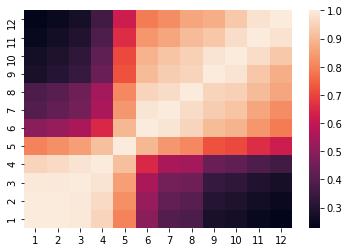

In [151]:
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

In [121]:
print(lin_vals)

[[1.         0.98248242 0.96114412 0.95121319 0.90460212 0.71041576
  0.47315452 0.38221755 0.31722107 0.27903575 0.25892686 0.24506719]
 [0.98248242 1.         0.99294096 0.98335407 0.95183908 0.75358897
  0.50744447 0.41371993 0.34471121 0.30324662 0.28150918 0.26641857]
 [0.96114412 0.99294096 1.         0.99445655 0.96767089 0.76605118
  0.51650029 0.42217762 0.3524165  0.31063183 0.28872567 0.27348558]
 [0.95121319 0.98335407 0.99445655 1.         0.97601547 0.78270474
  0.53881083 0.44590866 0.37730722 0.33579883 0.31386207 0.29857912]
 [0.90460212 0.95183908 0.96767089 0.97601547 1.         0.86372819
  0.64402416 0.55500195 0.48563069 0.44082381 0.41642609 0.39986809]
 [0.71041576 0.75358897 0.76605118 0.78270474 0.86372819 1.
  0.91641715 0.85514805 0.80074403 0.7619774  0.73903904 0.72382307]
 [0.47315452 0.50744447 0.51650029 0.53881083 0.64402416 0.91641715
  1.         0.98668085 0.96352048 0.94102505 0.92561751 0.91487866]
 [0.38221755 0.41371993 0.42217762 0.44590866 0.5

In [114]:
print(lin_vals)

[[1.         0.98822128 0.96864577 0.94506764 0.84834738 0.58058964
  0.38203942 0.30834932 0.27336096 0.25623951 0.2498741  0.24393084]
 [0.98822128 1.         0.98886123 0.96045117 0.87905716 0.61475402
  0.41201909 0.33673577 0.30072946 0.28261005 0.27595218 0.26954692]
 [0.96864577 0.98886123 1.         0.9828193  0.90749149 0.63409695
  0.42791082 0.35237271 0.31687092 0.29899749 0.29216579 0.28537392]
 [0.94506764 0.96045117 0.9828193  1.         0.93184827 0.66351566
  0.46338771 0.3904026  0.3567184  0.33894004 0.33143854 0.32377679]
 [0.84834738 0.87905716 0.90749149 0.93184827 1.         0.83521269
  0.66546147 0.5968039  0.55941694 0.53621035 0.52402475 0.51286493]
 [0.58058964 0.61475402 0.63409695 0.66351566 0.83521269 1.
  0.94082216 0.89526446 0.86034934 0.83374846 0.81842072 0.80571088]
 [0.38203942 0.41201909 0.42791082 0.46338771 0.66546147 0.94082216
  1.         0.9877828  0.96883966 0.94919752 0.9360177  0.92503854]
 [0.30834932 0.33673577 0.35237271 0.3904026  0.5

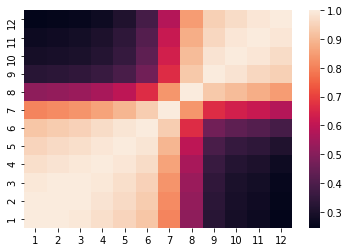

In [113]:
# Random
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

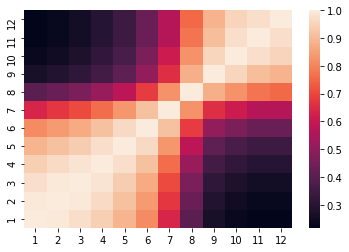

In [95]:
# Core set
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

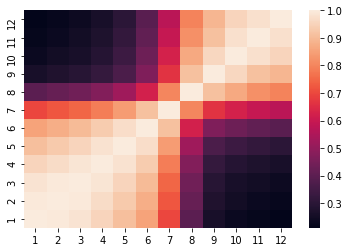

In [105]:
# Entropy
sns.heatmap(np.flip(lin_vals, 1), xticklabels=range(1, 12+1), yticklabels=range(12, 0, -1));

(200.0, 1000.0)

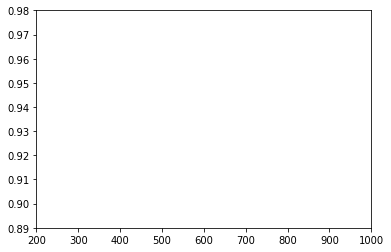

In [9]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "long-besov"],
    x="labeled",
    y="f1_micro",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=95,
    linewidth=3,
)
g.set_ylim(0.89, 0.98)
g.set_xlim(200, 1000)

In [7]:
g = sns.lineplot(
    data=df_tr[df_tr.index.get_level_values("mode") == "ada-besov"],
    x="labeled",
    y="f1_micro",
    hue="sampler",
    style="sampler",
    markers=True,
    dashes=False,
    ci=95,
    linewidth=3,
)
# g.set_ylim(0.82, 0.92)
# g.set_xlim(500, 1000)

ValueError: Could not interpret value `acuraccy` for parameter `y`

In [57]:
from transformers import AutoAdapterModel, AdapterConfig
from datasets import load_dataset

d = load_dataset("glue", "qqp")


def save_dataset(hfd, name):
    hfd["train"].to_pandas()[["question1", "question2", "label"]].sample(
        5_000
    ).reset_index(drop=True).to_csv(f"data/{name}/train.csv", header=False)
    hfd["test"].to_pandas()[["question1", "question2", "label"]].sample(
        2_000
    ).reset_index(drop=True).to_csv(f"data/{name}/test.csv", header=False)
    hfd["validation"].to_pandas()[["question1", "question2", "label"]].sample(
        1_000
    ).reset_index(drop=True).to_csv(f"data/{name}/validation.csv", header=False)


save_dataset(d, "QQP")

In [8]:
model = AutoAdapterModel.from_pretrained("bert-base-uncased")
a = model.load_adapter("adapters/TREC-2-BERT-pfeiffer")
model.add_classification_head("head", num_labels=2)
model.add_adapter("head")
model.train_adapter("head")

In [37]:
from datasets import load_dataset
d = load_dataset("glue", "cola")

Reusing dataset glue (/home/jjukic/.cache/huggingface/datasets/glue/cola/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [44]:
d["test"][3]

{'sentence': 'the kittens yawned awake and played.', 'label': -1, 'idx': 3}